## Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Load extracted feature data set

In [2]:
path = './data/all_dog_wounds_noAugmentation/extracted_features/'
pred_save_path = 'Unet-2-dog-w-augment-2021-07-25/'

# uncompressed: uncompressed_features_rotations.csv
# pca compressed: pca_compressed_features_rotations.csv
# vae compressed: VAE-1_compressed_features_rotations.csv

feature_path = path + pred_save_path + "uncompressed_features_rotations.csv"
#print(feature_path)

feature_data = pd.read_csv(feature_path, sep = "\t", index_col = 0)
#feature_data = feature_data.dropna(axis='columns')

print("dimension of the input data: ", feature_data.shape)
feature_data.head(5)

dimension of the input data:  (544, 3139)


,0,1,2,3,4,5,6,7,8,9,...,3129,3130,3131,3132,3133,3134,3135,Day,Dog_label,Area_mm2
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,0.0,3.909721,0.000000,5.583603,0.0,5.476412,0.0,1,563.673469
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,2.172515,0.000000,0.0,15.297228,2.0,1,621.235078
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.0,0.284720,0.000000,0.000000,0.0,5.846832,4.0,1,644.143823
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,9.453906,7.0,1,539.266118
-01-CON-D09-L.png,0.000000,9.426241,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,10.841634,9.0,1,473.401923


In [3]:
wound_area_df = feature_data[['Day', 'Dog_label', 'Area_mm2']]

for label in set(wound_area_df.Dog_label):
    temp = wound_area_df[wound_area_df.Dog_label == label]['Area_mm2'].iloc[0]
    wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \
        wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_mm2'] / temp

/var/folders/qg/n_qkcysd0vxfsffsxdxmyqq80000gn/T/ipykernel_23724/405826525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df.loc[wound_area_df.Dog_label == label, 'Area_precentage'] = \


In [4]:
# Add the Area_precentage column back to feature dataset as a feature
feature_data['Area_precentage'] = wound_area_df['Area_precentage'].values
#print(feature_data)

## Read the clinical file for days until heal data

In [5]:
clinical_path = './data/all_dog_wounds_noAugmentation/'
clinical_df = pd.read_csv(clinical_path+"wound_image_labels.csv")

wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4
#print(clinical_df.loc[:,'Days_until_heal'])

fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

/var/folders/qg/n_qkcysd0vxfsffsxdxmyqq80000gn/T/ipykernel_23724/1111790543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wound_area_df['Days_until_heal'] = list(clinical_df['Days_until_heal'].values)*4


In [6]:
print(wound_area_df[wound_area_df.Dog_label == 5])
#print(wound_area_df[wound_area_df.Dog_label == 6])

                             Day  Dog_label    Area_mm2  Area_precentage  \
-05-CON-D02-L.png            2.0          5  711.840000         1.000000   
-05-CON-D04-L.png            4.0          5  659.363853         0.926281   
-05-CON-D07-L.png            7.0          5  494.384766         0.694517   
-05-CON-D09-L.png            9.0          5  232.888889         0.327165   
-05-CON-D11-L.png           11.0          5  117.528889         0.165106   
-05-CON-D14-L.png           14.0          5   50.813802         0.071384   
-05-CON-D16-L.png           16.0          5   30.040816         0.042202   
-05-CON-D18-L.png           18.0          5   21.973333         0.030868   
-05-CON-D21-L.png           21.0          5    8.742756         0.012282   
-05-CON-D23-L.png           23.0          5    4.128086         0.005799   
-05-CON-D25-L.png           25.0          5    0.000000         0.000000   
-05-CON-D28-L.png           28.0          5    0.000000         0.000000   
-05-CON-D30-

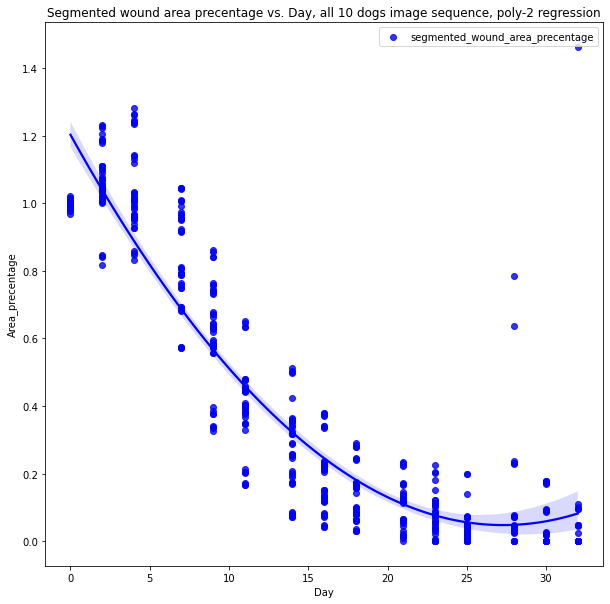

In [7]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Day', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Day, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Day, all 10 dogs image sequence.png")

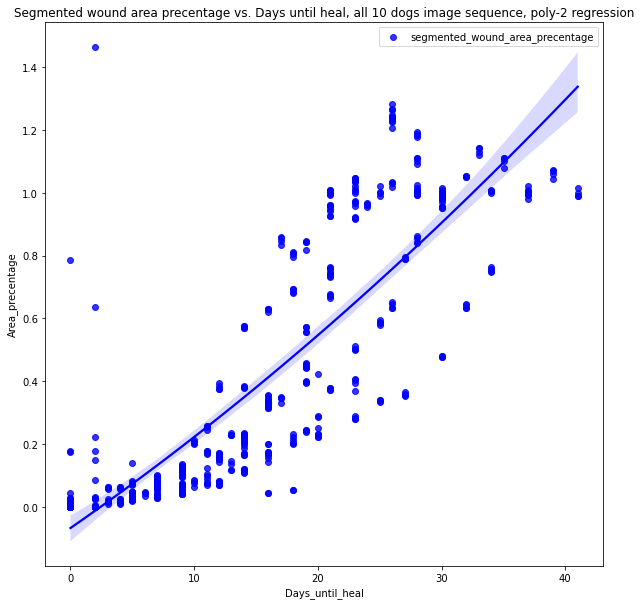

In [8]:
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

sns.regplot(data=wound_area_df, x='Days_until_heal', y='Area_precentage', order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
ax.set(title='Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence, poly-2 regression')
ax.legend(loc='upper right')

#fig.savefig(fig_path + "Segmented wound area precentage vs. Days until heal, all 10 dogs image sequence.png")

## Separate training and test data set
1. Try use dog 9 and 10 as separate test image sequence
2. Try use the < 15 days image sequence as training input and > 15 days image sequence as test input (Tried, not working)


In [20]:
# manually set the random seed to define a replication
r_seed = 42

# manually set the number for cross validation
num_cv = 5

# manually set the test dog wound image sequences (9 or 10)
# [9, 10]
test_num = [9]

print("current random seed is: ", r_seed)
print("current test wound image sequence is: ", test_num)

current random seed is:  42
current test wound image sequence is:  [9]


In [21]:
feature_data.head(4)

,0,1,2,3,4,5,6,7,8,9,...,3130,3131,3132,3133,3134,3135,Day,Dog_label,Area_mm2,Area_precentage
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,3.909721,0.000000,5.583603,0.0,5.476412,0.0,1,563.673469,1.000000
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,2.172515,0.000000,0.0,15.297228,2.0,1,621.235078,1.102119
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.284720,0.000000,0.000000,0.0,5.846832,4.0,1,644.143823,1.142761
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,9.453906,7.0,1,539.266118,0.956699


### Part 1
Train the GPR on the 1-8 dog wound image sequence

In [22]:
# 1. use dog 9 and 10 as separate test image sequences, use dog 1-8 as training image sequences
#    Notice: dog 2 is a good example of chronic wound
#    Train data need to drop the Dog_label column, but save the Area_mm2 and Area_precentage columns as features
# Train
X_train = feature_data[feature_data['Dog_label'].isin(range(1,9))]
X_train = X_train.drop(['Dog_label'], axis = 1)
X_train = X_train.drop(['Day'], axis = 1)
print("The training dataset's shape is: ", X_train.shape)

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
X_test = feature_data[feature_data['Dog_label'].isin(test_num)]
X_test = X_test.drop(['Dog_label'], axis = 1)
X_test = X_test.drop(['Day'], axis = 1)
#print(X_test.shape)

# Label
Y_train = wound_area_df[wound_area_df['Dog_label'].isin(range(1,9))]
Y_train = Y_train['Days_until_heal']

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
Y_test = wound_area_df[wound_area_df['Dog_label'].isin(test_num)]
Y_test = Y_test['Days_until_heal']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 and 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
days_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Day']
print("The test wound image sequence's days:\n", days_seq)

#Area_prop_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Area_precentage']
Area_prop_seq = wound_area_df[wound_area_df.Dog_label.isin(test_num)]['Area_precentage']
print("The test wound image sequence's Area proportion:\n", Area_prop_seq)

The training dataset's shape is:  (440, 3138)
The test wound image sequence's days:
 -09-CON-D00-R.png              0.0
-09-CON-D02-R.png              2.0
-09-CON-D04-R.png              4.0
-09-CON-D07-R.png              7.0
-09-CON-D09-R.png              9.0
-09-CON-D11-R.png             11.0
-09-CON-D14-R.png             14.0
-09-CON-D16-R.png             16.0
-09-CON-D18-R.png             18.0
-09-CON-D21-R.png             21.0
-09-CON-D23-R.png             23.0
-09-CON-D25-R.png             25.0
-09-CON-D28-R.png             28.0
-09-CON-D30-R.png             30.0
rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
rotate180-09-CON-D04-R.png     4.0
rotate180-09-CON-D07-R.png     7.0
rotate180-09-CON-D09-R.png     9.0
rotate180-09-CON-D11-R.png    11.0
rotate180-09-CON-D14-R.png    14.0
rotate180-09-CON-D16-R.png    16.0
rotate180-09-CON-D18-R.png    18.0
rotate180-09-CON-D21-R.png    21.0
rotate180-09-CON-D23-R.png    23.0
rotate180-09-CON-D25-R.png    25.0
rotat

In [23]:
X_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,3128,3129,3130,3131,3132,3133,3134,3135,Area_mm2,Area_precentage
-01-CON-D00-L.png,1.813378,2.347464,0.0,1.130197,0.0,0.000000,5.545171,1.625675,0.0,0.0,...,0.0,0.0,0.0,3.909721,0.000000,5.583603,0.0,5.476412,563.673469,1.000000
-01-CON-D02-L.png,0.000000,7.903786,0.0,0.000000,0.0,0.386018,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,2.172515,0.000000,0.0,15.297228,621.235078,1.102119
-01-CON-D04-L.png,0.000000,10.872821,0.0,0.000000,0.0,0.000000,0.542695,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.284720,0.000000,0.000000,0.0,5.846832,644.143823,1.142761
-01-CON-D07-L.png,0.000000,5.983671,0.0,0.000000,0.0,0.000000,4.467634,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,9.453906,539.266118,0.956699


### Part 2
Train the GPR on all dog wound image sequences' (1 - 10) day 1-15 sequences.
Predict all all dog wound image sequences' (1 - 10) day 16-32 sequences.

In [24]:
# 2. use the < 16 days image sequence as training input and > 16 days image sequence as test input
# Train
#X_train = feature_data[feature_data['Day'].isin(range(0,16))]
#X_train = X_train.drop(['Dog_label','Area_mm2'], axis = 1)

#X_test = feature_data[feature_data['Day'].isin(range(16,35))]
#X_test = X_test[X_test['Dog_label'].isin([test_num])]

#X_test = feature_data[feature_data['Dog_label'].isin([test_num])]
#X_test = X_test.drop(['Dog_label','Area_mm2'], axis = 1)
# Label
#Y_train = wound_area_df[wound_area_df['Day'].isin(range(0,16))]
#Y_train = Y_train['Area_precentage']

#Y_test = wound_area_df[wound_area_df['Day'].isin(range(16, 35))]
#Y_test = Y_test[Y_test['Dog_label'].isin([test_num])]

#Y_test = wound_area_df[wound_area_df['Dog_label'].isin([test_num])]
#Y_test = Y_test['Area_precentage']

#print(X_test)
#print(Y_test)

# the days vector
# 1. predict the dog 9 or 10 wound image sequences
#days_seq = wound_area_df[wound_area_df.Dog_label == test_num]['Day']
#print("The test wound image sequence's days:\n", days_seq)

## Gaussian Process Regressor
Define the GaussianProcessRegressor object.

### Grid search for GP regressor

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct,WhiteKernel,RationalQuadratic,ExpSineSquared
from sklearn.model_selection import GridSearchCV

# Kernel with parameters given in GPML book
#k1 = ConstantKernel(constant_value=66.0**2) * RBF(length_scale=67.0)  # long term smooth rising trend
#k2 = ConstantKernel(constant_value=2.4**2) * RBF(length_scale=90.0) \
#    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
#k3 = ConstantKernel(constant_value=0.66**2) \
#    * RationalQuadratic(length_scale=1.2, alpha=0.78)
#k4 = ConstantKernel(constant_value=0.18**2) * RBF(length_scale=0.134) \
#    + WhiteKernel(noise_level=0.19**2)  # noise terms
#kernel_gpml = k1 + k2 + k3 + k4
#gp = GaussianProcessRegressor(kernel=kernel_gpml)

#param_grid = {'alpha': np.logspace(-2, 4, 5),
#              'kernel__k1__k1__k1__k1__constant_value': np.logspace(-2, 4, 5),
#              'kernel__k1__k1__k1__k2__length_scale': np.logspace(-2, 2, 5),
#              'kernel__k2__k2__noise_level':np.logspace(-2, 1, 5)
#              }


param_grid = [{
    "alpha":  [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
    "kernel": [RBF(l) for l in np.logspace(-1, 1, num = 20)]
}, {
    "alpha":  [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, num = 20)]
}]
gp = GaussianProcessRegressor(random_state = r_seed)

# print parameters
print(gp.get_params())

# scores for regression
#
#Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 
#'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 
#'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 
#'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 
#'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 
#'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 
#'roc_auc', 'v_measure_score']

grid_gp = GridSearchCV(estimator = gp, cv=num_cv, param_grid=param_grid, n_jobs=-1, scoring = 'r2', verbose=5)
grid_gp.fit(X_train, Y_train)

print(grid_gp.best_params_)
gp = grid_gp.best_estimator_

print("The CV results are: ", grid_gp.best_score_)

# Make the prediction on test set.
Y_pred = gp.predict(X_test)
#print(Y_pred)

{'alpha': 1e-10, 'copy_X_train': True, 'kernel': None, 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 42}
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.1);, score=-2.255 total time=   2.3s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.207);, score=-2.255 total time=   2.0s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.207);, score=-2.384 total time=   2.0s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.336);, score=-2.272 total time=   2.0s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.546);, score=-3.450 total time=   2.2s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.695);, score=-2.384 total time=   2.0s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=1.13);, score=-2.285 total time=   2.6s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=1.44);, score=-2.384 total time=   2.2s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=2.34);, score=-2.285 total

[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.1);, score=-3.450 total time=   2.3s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.162);, score=-3.450 total time=   2.0s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.207);, score=-3.450 total time=   2.0s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.264);, score=-2.384 total time=   2.0s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.428);, score=-2.285 total time=   2.3s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.695);, score=-2.255 total time=   2.0s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.886);, score=-2.384 total time=   2.7s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=1.44);, score=-2.285 total time=   2.2s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=2.34);, score=-3.450 total time=   2.0s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=3.79);, score=-2.255 total time=   1.9s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=4.83);, score=-2.285 total time=   2.1s
[CV 4/5] END alpha=1.0, ker

[CV 2/5] END alpha=0.0001, kernel=DotProduct(sigma_0=0.546);, score=0.277 total time=   0.3s
[CV 4/5] END alpha=0.0001, kernel=DotProduct(sigma_0=0.546);, score=-0.701 total time=   1.0s
[CV 3/5] END alpha=0.0001, kernel=DotProduct(sigma_0=0.886);, score=-1.964 total time=   1.0s
[CV 1/5] END alpha=0.0001, kernel=DotProduct(sigma_0=1.44);, score=-0.133 total time=   0.8s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.127);, score=-2.255 total time=   2.2s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.162);, score=-2.272 total time=   2.1s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.264);, score=-2.285 total time=   2.0s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.336);, score=-2.384 total time=   2.1s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.546);, score=-2.285 total time=   2.2s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.886);, score=-2.255 total time=   2.1s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=1.13);, score=-2.384 total time=   2.7s
[CV 

[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.127);, score=-3.450 total time=   2.3s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.162);, score=-2.384 total time=   2.1s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.264);, score=-2.272 total time=   2.0s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.428);, score=-2.255 total time=   2.1s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.546);, score=-2.272 total time=   2.2s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.886);, score=-2.285 total time=   2.1s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=1.44);, score=-2.255 total time=   2.7s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=1.83);, score=-2.272 total time=   2.2s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=2.98);, score=-2.255 total time=   2.1s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=3.79);, score=-2.272 total time=   2.0s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=6.16);, score=0.705 total time=  11.3s
[CV 1/5] END alpha=1.0, ker

[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.264);, score=0.276 total time=   0.4s[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.1);, score=-2.285 total time=   2.2s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.127);, score=-2.272 total time=   2.1s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.207);, score=-2.285 total time=   2.0s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.336);, score=-3.450 total time=   2.1s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.428);, score=-2.272 total time=   2.2s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.695);, score=-3.450 total time=   2.0s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.886);, score=-2.272 total time=   2.6s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=1.44);, score=-3.450 total time=   2.2s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=1.83);, score=-2.384 total time=   2.1s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=2.98);, score=-2.285 total time=   2.0s
[CV 1/5] END alpha=1.0, 

[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.1);, score=-2.384 total time=   2.2s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.162);, score=-2.285 total time=   2.1s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.264);, score=-2.255 total time=   2.0s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.336);, score=-2.285 total time=   2.0s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.546);, score=-2.255 total time=   2.2s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.695);, score=-2.285 total time=   2.0s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=1.13);, score=-2.255 total time=   2.7s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=1.44);, score=-2.272 total time=   2.2s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=2.34);, score=-2.255 total time=   2.0s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=2.98);, score=-2.384 total time=   2.0s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=4.83);, score=-2.272 total time=   2.1s
[CV 5/5] END alpha=1.0, kern

[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.1);, score=-2.272 total time=   2.2s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.127);, score=-2.384 total time=   2.1s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.207);, score=-2.272 total time=   2.0s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.336);, score=-2.255 total time=   2.1s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.428);, score=-2.384 total time=   2.2s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=0.695);, score=-2.272 total time=   2.0s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=1.13);, score=-3.450 total time=   2.8s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=1.83);, score=-2.285 total time=   2.2s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=2.34);, score=-2.384 total time=   2.1s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=3.79);, score=-2.384 total time=   2.0s
[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=6.16);, score=-2.285 total time=   3.1s
[CV 4/5] END alpha=1.0, kern

[CV 3/5] END alpha=1.0, kernel=RBF(length_scale=0.127);, score=-2.285 total time=   2.2s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=0.162);, score=-2.255 total time=   2.1s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.264);, score=-3.450 total time=   2.1s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.428);, score=-3.450 total time=   2.1s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=0.546);, score=-2.384 total time=   2.2s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=0.886);, score=-3.450 total time=   2.0s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=1.13);, score=-2.272 total time=   2.7s
[CV 1/5] END alpha=1.0, kernel=RBF(length_scale=1.83);, score=-2.255 total time=   2.2s
[CV 4/5] END alpha=1.0, kernel=RBF(length_scale=2.34);, score=-2.272 total time=   2.0s
[CV 2/5] END alpha=1.0, kernel=RBF(length_scale=3.79);, score=-3.450 total time=   2.0s
[CV 5/5] END alpha=1.0, kernel=RBF(length_scale=4.83);, score=-2.384 total time=   3.0s
[CV 3/5] END alpha=1.0, ke

[CV 1/5] END alpha=0.0001, kernel=DotProduct(sigma_0=6.16);, score=-0.133 total time=   0.5s
[CV 1/5] END alpha=0.0001, kernel=DotProduct(sigma_0=7.85);, score=-0.133 total time=   0.6s
[CV 3/5] END alpha=0.0001, kernel=DotProduct(sigma_0=10);, score=-1.964 total time=   0.5s
[CV 3/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.1);, score=-2.005 total time=   0.3s
[CV 4/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.127);, score=-0.860 total time=   0.3s
[CV 3/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.207);, score=-1.964 total time=   1.2s
[CV 4/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.336);, score=-0.701 total time=   1.0s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.546);, score=0.277 total time=   0.3s
[CV 4/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.546);, score=-0.701 total time=   1.2s
[CV 3/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.886);, score=-1.964 total time=   1.0s
[CV 1/5] END alpha=1e-05, kernel=DotProduct(sigma_0=1.44);, score=-0.133 to

[CV 5/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.264);, score=-3.478 total time=   1.0s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.428);, score=0.277 total time=   0.3s
[CV 1/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.546);, score=-0.133 total time=   1.0s
[CV 4/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.695);, score=-0.701 total time=   1.1s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=1.13);, score=0.276 total time=   1.1s
[CV 1/5] END alpha=1e-05, kernel=DotProduct(sigma_0=1.83);, score=-0.133 total time=   0.8s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=2.34);, score=0.276 total time=   1.2s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=3.79);, score=0.276 total time=   1.3s
[CV 5/5] END alpha=1e-05, kernel=DotProduct(sigma_0=6.16);, score=-3.478 total time=   0.6s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=10);, score=0.276 total time=   1.3s
[CV 2/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.264);, score=0.276 total time

[CV 4/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.127);, score=-0.860 total time=   0.3s
[CV 1/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.207);, score=-0.264 total time=   0.3s
[CV 3/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.264);, score=-1.964 total time=   1.2s
[CV 2/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.428);, score=0.277 total time=   0.3s
[CV 1/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.546);, score=-0.133 total time=   1.0s
[CV 4/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.695);, score=-0.701 total time=   1.4s
[CV 2/5] END alpha=1e-06, kernel=DotProduct(sigma_0=1.13);, score=0.276 total time=   1.0s
[CV 4/5] END alpha=1e-06, kernel=DotProduct(sigma_0=1.44);, score=-0.701 total time=   0.9s
[CV 2/5] END alpha=1e-06, kernel=DotProduct(sigma_0=2.34);, score=0.276 total time=   1.1s
[CV 3/5] END alpha=1e-06, kernel=DotProduct(sigma_0=3.79);, score=-1.964 total time=   0.7s
[CV 5/5] END alpha=1e-06, kernel=DotProduct(sigma_0=4.83);, score=-3.478 tota

[CV 5/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.336);, score=-3.478 total time=   1.4s
[CV 5/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.546);, score=-3.478 total time=   1.1s
[CV 4/5] END alpha=1e-05, kernel=DotProduct(sigma_0=0.886);, score=-0.701 total time=   1.0s
[CV 2/5] END alpha=1e-05, kernel=DotProduct(sigma_0=1.44);, score=0.276 total time=   1.1s
[CV 3/5] END alpha=1e-05, kernel=DotProduct(sigma_0=2.34);, score=-1.964 total time=   0.7s
[CV 3/5] END alpha=1e-05, kernel=DotProduct(sigma_0=2.98);, score=-1.964 total time=   0.7s
[CV 5/5] END alpha=1e-05, kernel=DotProduct(sigma_0=3.79);, score=-3.478 total time=   0.8s
[CV 3/5] END alpha=1e-05, kernel=DotProduct(sigma_0=6.16);, score=-1.964 total time=   0.5s
[CV 5/5] END alpha=1e-05, kernel=DotProduct(sigma_0=7.85);, score=-3.478 total time=   0.6s
[CV 1/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.1);, score=-0.265 total time=   0.3s
[CV 5/5] END alpha=1e-06, kernel=DotProduct(sigma_0=0.1);, score=-3.398 total t

{'alpha': 1.0, 'kernel': RBF(length_scale=10)}
The CV results are:  0.7912371236555151


In [26]:
#print("coefficients of training data points (features) in kernel space\n", gp.alpha_)

In [27]:
from sklearn.metrics import r2_score

# OG: [0:14], 180 degree: [14:28], 270 degree: [28:42], 90 degree: [42:56]
print(days_seq[14:28])

# Independent test images R2 score
print("Test set results are: ", r2_score(Y_test, Y_pred))

rotate180-09-CON-D00-R.png     0.0
rotate180-09-CON-D02-R.png     2.0
rotate180-09-CON-D04-R.png     4.0
rotate180-09-CON-D07-R.png     7.0
rotate180-09-CON-D09-R.png     9.0
rotate180-09-CON-D11-R.png    11.0
rotate180-09-CON-D14-R.png    14.0
rotate180-09-CON-D16-R.png    16.0
rotate180-09-CON-D18-R.png    18.0
rotate180-09-CON-D21-R.png    21.0
rotate180-09-CON-D23-R.png    23.0
rotate180-09-CON-D25-R.png    25.0
rotate180-09-CON-D28-R.png    28.0
rotate180-09-CON-D30-R.png    30.0
Name: Day, dtype: float64
Test set results are:  0.8949215787078649


### Part 1 plots
connected line and poly-2 regression line

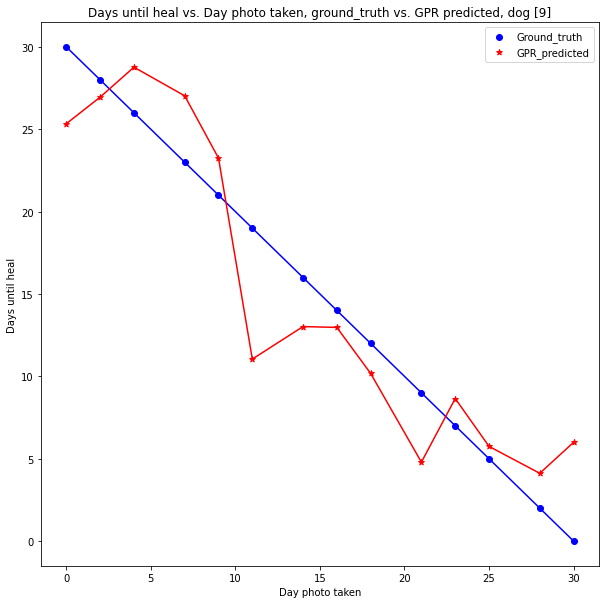

In [28]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fig_path = './data/all_dog_wounds_noAugmentation/figures/'
fig_path = fig_path + pred_save_path

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = days_seq[14:28] , y = Y_test[14:28], color = 'blue', marker = 'o', label = "Ground_truth")
plt.plot(days_seq[14:28] , Y_test[14:28], linestyle='solid',color='blue')#, label='Ground_truth')

plt.scatter(x = days_seq[14:28] , y = Y_pred[14:28], color = 'red', marker = '*', label = "GPR_predicted")
plt.plot(days_seq[14:28] , Y_pred[14:28], linestyle='solid',color='red')#, label='GPR_predicted')

plt.title("Days until heal vs. Day photo taken, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Day photo taken")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted,dog {},days until heal,connected_lines, 180rotation_images.png".format(test_num))

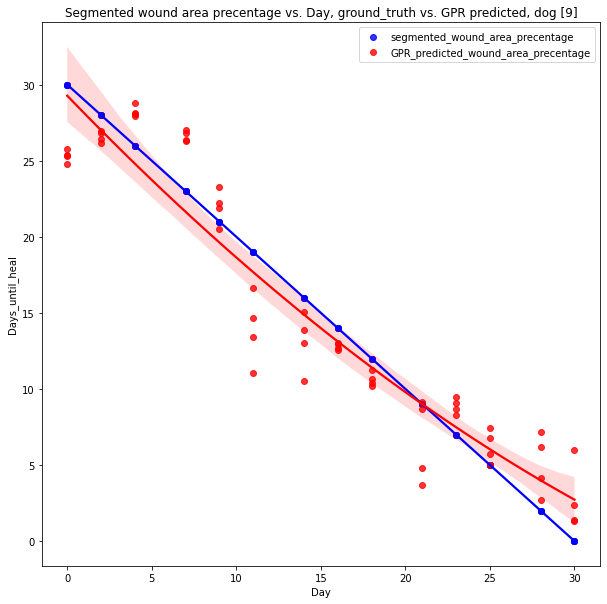

In [29]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=days_seq , y=Y_test, order = 2,
            color='blue', label='segmented_wound_area_precentage', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=days_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_wound_area_precentage', ax=ax)

ax.set(title='Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

#fig.savefig(fig_path + "ground_truth vs. GPR predicted, dog {}, poly2_regression.png".format(test_num))

In [31]:
test_num

[9]

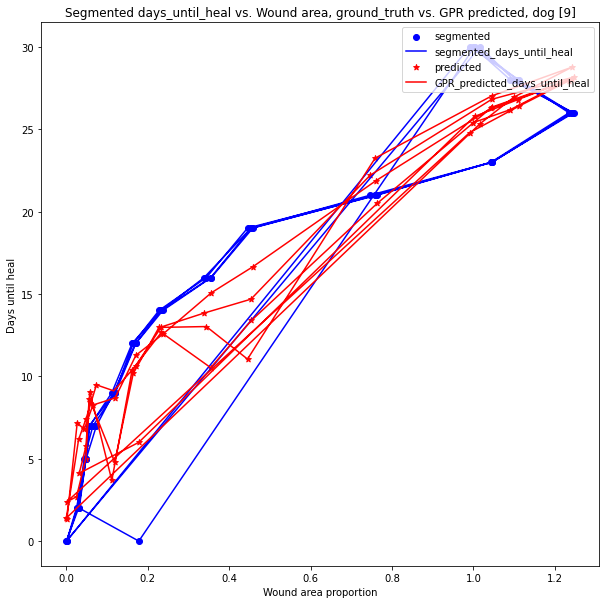

In [30]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(x = Area_prop_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
plt.plot(Area_prop_seq , Y_test, linestyle='solid',color='blue', label='segmented_days_until_heal')

plt.scatter(x = Area_prop_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
plt.plot(Area_prop_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_days_until_heal')

plt.title("Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}".format(test_num))
plt.xlabel("Wound area proportion")
plt.ylabel("Days until heal")
ax.legend(loc='upper right')

plt.show()
fig.tight_layout()
#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, connected_lines.png".format(test_num))

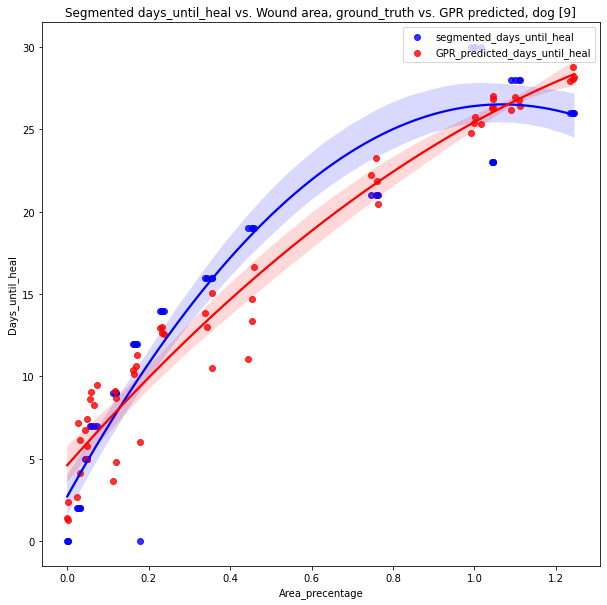

In [32]:
# Regression plot

fig, ax = plt.subplots(figsize=(10,10))
# Plot the segmentation wound area change. 
# If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

# plot the segmented ground truth
sns.regplot(x=Area_prop_seq , y=Y_test, order = 2,
            color='blue', label='segmented_days_until_heal', ax=ax)
# plot the predicted wound area precentage
sns.regplot(x=Area_prop_seq , y=Y_pred, order = 2,
            color='red', label='GPR_predicted_days_until_heal', ax=ax)

ax.set(title='Segmented days_until_heal vs. Wound area, ground_truth vs. GPR predicted, dog {}'.format(test_num))
ax.legend(loc='upper right');

#fig.savefig(fig_path + "ground_truth vs. GPR predicted days_until_heal vs. Wound area, dog {}, poly2_regression.png".format(test_num))

### Part 2 plots
connected line and poly-2 regression line

In [33]:
# Scatter plot with points connected with line
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

#fig, ax = plt.subplots(figsize=(10,10))

#plt.scatter(x = days_seq , y = Y_test, color = 'blue', marker = 'o', label = "segmented")
#plt.plot(days_seq , Y_test, linestyle='solid',color='blue', label='segmented_wound_area_precentage')

#plt.scatter(x = days_seq , y = Y_pred, color = 'red', marker = '*', label = "predicted")
#plt.plot(days_seq , Y_pred, linestyle='solid',color='red', label='GPR_predicted_wound_area_precentage')

#plt.axvline(x = 16, linestyle = '--', c = 'black')

#plt.title("Segmented wound area precentage vs. Day, ground_truth vs. GPR predicted, dog {}".format(test_num))
#plt.xlabel("Day")
#plt.ylabel("Area_precentage")
#ax.legend(loc='upper right')
#plt.show()

#fig.tight_layout()
#fig.savefig(fig_path + "(Train on < 16 days' all wound sequences)ground_truth vs. GPR predicted, dog {}, connected_lines.png".format(test_num))